In [1]:
import asyncio
import os

from bilibili_api import search, sync, video, comment, Credential
from dotenv import load_dotenv

import nest_asyncio
nest_asyncio.apply()

load_dotenv()
SESSDATA = os.getenv("SESSDATA")
BILI_JCT = os.getenv("BILI_JCT")
BUVID3 = os.getenv("BUVID3")
credential = Credential(sessdata=SESSDATA,
                        bili_jct=BILI_JCT,
                        buvid3=BUVID3)

comments = []

b = []
async def main():
    count = 0
    # 存储评论
    # 页码
    page = 1
    # 当前已获取数量
    while True:
        # 获取评论
        c = await comment.get_comments(video.Video(bvid='BV1qs4y1B75b').get_aid(),
                                       comment.CommentResourceType.VIDEO,
                                       page,
                                       credential=credential)
        if c['replies']:
            comments.extend(c['replies'])
        # 增加已获取数量
        count += c['page']['size']
        # 增加页码
        page += 1

        if count >= c['page']['count']:
            # 当前已获取数量已达到评论总数，跳出循环
            break
    b.append(count)

asyncio.get_event_loop().run_until_complete(main())

In [2]:
print(comments)

[{'rpid': 187482528288, 'oid': 996175323, 'type': 1, 'mid': 124103080, 'root': 0, 'parent': 0, 'dialog': 0, 'count': 0, 'rcount': 0, 'state': 0, 'fansgrade': 0, 'attr': 0, 'ctime': 1695666737, 'mid_str': '124103080', 'oid_str': '996175323', 'rpid_str': '187482528288', 'root_str': '0', 'parent_str': '0', 'dialog_str': '0', 'like': 129, 'action': 0, 'member': {'mid': '124103080', 'uname': '柠檬糖レモン', 'sex': '女', 'sign': '如果不让我评论，请不要给我推送相关的视频', 'avatar': 'https://i1.hdslb.com/bfs/face/12d45c5b00f6fce538336b282301f4ecaaee6c98.jpg', 'rank': '10000', 'face_nft_new': 0, 'is_senior_member': 0, 'senior': {}, 'level_info': {'current_level': 5, 'current_min': 0, 'current_exp': 0, 'next_exp': 0}, 'pendant': {'pid': 0, 'name': '', 'image': '', 'expire': 0, 'image_enhance': '', 'image_enhance_frame': '', 'n_pid': 0}, 'nameplate': {'nid': 0, 'name': '', 'image': '', 'image_small': '', 'level': '', 'condition': ''}, 'official_verify': {'type': -1, 'desc': ''}, 'vip': {'vipType': 1, 'vipDueDate': 1607788

In [2]:
new_comments = []

In [3]:
for comment in comments:
    new_comments.append(comment)
    new_comments.extend(comment['replies'])

In [4]:
print(len(new_comments))

394


In [11]:
for comment in new_comments:
    print(comment['member']['uname'])
    print(comment['content']['message'])
    print(comment['like'])
    print(comment['ctime'])

柠檬糖レモン
还活着的人就继续前进吧
129
1695666737
alehamilton
freedom！
37
1695624117
墨尔本猴腮official
还活着的人就继续前进吧
35
1695551685
快乐溜达的小土豆
自由万岁
36
1694918140
Decarboxylation
经济贸易发展
信息加速流动
四化进程深入
思想文化变迁
制度张力增强
自治组织生长
政治权力让渡
参与民主普及
稳态社会达成
56
1694665775
哈属莫啵上司嘴
人民万岁！
19
1693924430
罗罗诺亚北觅
还活着的人就继续前进吧
42
1692771821
柳青高分少女
还活着的人就继续前进吧
41
1692458101
账号已注销
还活着的人就继续前进吧
32
1692454905
沃克尔365ll号
路过
5
1692058363
fengzhibitu
生命诚可贵容 爱情价更高 若为自由故 两者皆可抛
86
1687588153
烤火的小猫
사랑도 명예도 이름도 남김없이
爱 荣誉 名声 什么都没有留下
한 평생 나가자던 뜨거운 맹세
一辈子所坚持的 就像热血般的誓盟
동지는 간 데 없고 깃발만 나부껴
同志已经牺牲 只留下旗帜在飘扬
새 날이 올 때까지 흔들리지 말자
直到新社会到来 我们不要动摇
세월은 흘러가도 산천은 안다
岁月虽然会流逝 山川却会知道
깨어나서 외치는 뜨거운 함성
醒来时的呐喊 有如沸血的嘶吼
앞서서 나가니 산 자여 따르라
我将一往无前 还活着的人就跟着前进吧
앞서서 나가니 산 자여 따르라
我将一往无前 还活着的人就跟着前进吧
세월은 흘러가도 산천은 안다
岁月虽然会流逝 山川却会知道
깨어나서 외치는 뜨거운 함성
醒来时的呐喊 有如沸血的嘶吼
앞서서 나가니 산 자여 따르라
我将一往无前 还活着的人就跟我前进吧
앞서서 나가니 산 자여 따르라
我将一往无前 还活着的人就跟我前进吧
산 자여 따르라
跟着我前进吧
33
1687415421
pinweijiyi
我真的不知道为什么这么多中国人看不起韩国人 无论经济还是社会韩国都领先很多 诚然也有很多问题 但是我们有什么资格取笑人家
113
1687342585
如梦似幻的岁月
十几年前韩流席卷，韩国歌曲电视剧很多，民间交流也密切，后来……


AttributeError: 'Index' object has no attribute 'strftime'

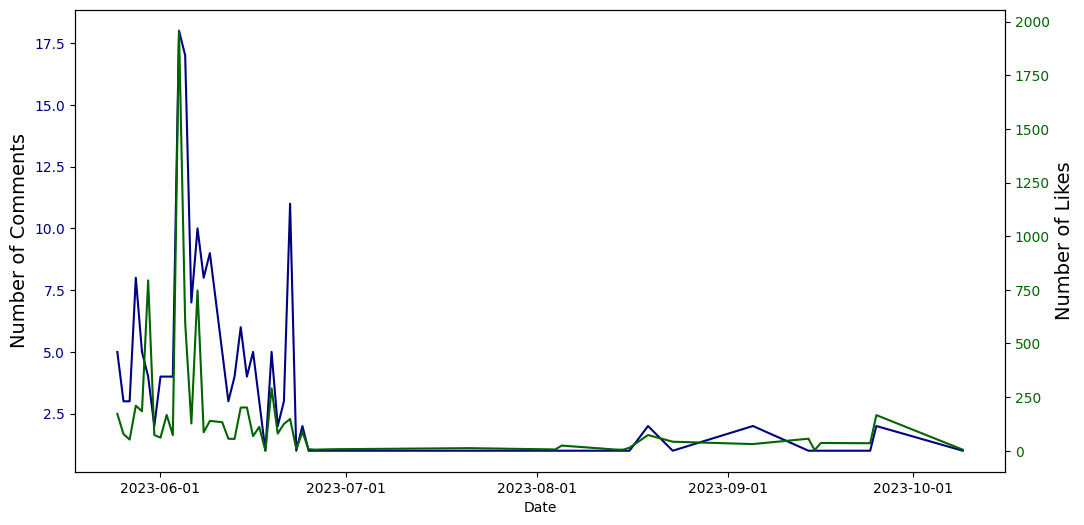

In [6]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Set the background to white
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Extract dates, comments, and likes
dates = [datetime.fromtimestamp(comment['ctime']).date() for comment in new_comments]
likes = [comment['like'] for comment in new_comments]

# Create a DataFrame
data = pd.DataFrame({'date': dates, 'comments': 1, 'likes': likes})
data = data.groupby('date').agg({'comments': 'count', 'likes': 'sum'}).sort_index()

# Filter dates starting from 2023-05-19 (assuming there's a typo in the date you provided)
start_date = datetime(2023, 5, 25).date()
data = data[data.index >= start_date]

# Plot with two scales
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot number of comments with a darker color
color = 'navy'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Comments', fontsize=14)
ax1.plot(data.index, data['comments'], color=color, label='Number of Comments')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for number of likes with a darker color
ax2 = ax1.twinx()
color = 'darkgreen'
ax2.set_ylabel('Number of Likes', fontsize=14)
ax2.plot(data.index, data['likes'], color=color, label='Number of Likes')
ax2.tick_params(axis='y', labelcolor=color)

# Reduce the number of horizontal labels
ax1.set_xticks(ax1.get_xticks()[::2])
ax1.set_xticklabels(data.index.strftime('%Y-%m-%d')[::2], rotation=45)

plt.title('Number of Comments and Likes per Day')
fig.tight_layout()

# Add legends with larger font size
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

plt.show()
